# Import all the python package

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into pandas dataframe

In [2]:
icreviews = pd.read_csv(r'C:\Users\Admin\Downloads\reviews.csv')

In [3]:
icreviews.describe()

,stars,helpful_yes,helpful_no
count,7943.000000,7943.000000,7943.000000
mean,4.305804,0.989299,0.526627
std,1.315225,3.730841,2.708542
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000
max,5.000000,105.000000,86.000000


In [4]:
icreviews.head()

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...


In [5]:
icreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   key          7943 non-null   object
 1   author       7659 non-null   object
 2   date         7943 non-null   object
 3   stars        7943 non-null   int64 
 4   title        5332 non-null   object
 5   helpful_yes  7943 non-null   int64 
 6   helpful_no   7943 non-null   int64 
 7   text         7943 non-null   object
dtypes: int64(3), object(5)
memory usage: 496.6+ KB


# Checking for null values

In [6]:
icreviews.isnull()

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7938,False,False,False,False,False,False,False,False
7939,False,False,False,False,False,False,False,False
7940,False,False,False,False,False,False,False,False
7941,False,False,False,False,False,False,False,False


# Convert star rating to sentiments

In [7]:
def startosentiment(_star):
    if _star >= 4:
        return 'pos'
    elif _star <= 2:
        return 'neg'
    else:
        return 'neu'

# Use Vader to analyse the sentences and convert the compound score to sentiments

In [8]:
def get_score(analyser, _text):
    vpolarity = analyser.polarity_scores(_text)
    if vpolarity['compound'] > 0.05:
        return 'pos'
    elif vpolarity['compound'] < -0.05:
        return 'neg'
    else:
        return 'neu'

# Initilize the Vader Sentiment Analyzer

In [9]:
sia = SentimentIntensityAnalyzer()

In [10]:
icreviews['title'] = icreviews['title'].fillna('')
icreviews['com_titletext'] = icreviews['title'] + " " + icreviews['text']
icreviews['b_star'] = icreviews.apply(lambda x: startosentiment(x['stars']),axis=1)  
icreviews['com_score'] = icreviews.apply(lambda x: get_score(sia, x['com_titletext']),axis=1)
conf1 = metrics.confusion_matrix(icreviews['b_star'], icreviews['com_score'])
print(metrics.classification_report(icreviews['b_star'], icreviews['com_score'], digits=3))

              precision    recall  f1-score   support

         neg      0.700     0.493     0.579      1135
         neu      0.110     0.025     0.040       407
         pos      0.875     0.965     0.918      6401

    accuracy                          0.849      7943
   macro avg      0.562     0.494     0.512      7943
weighted avg      0.811     0.849     0.824      7943



# Plot the confusion matrix

Text(0.5, 1.0, 'Sumanth')

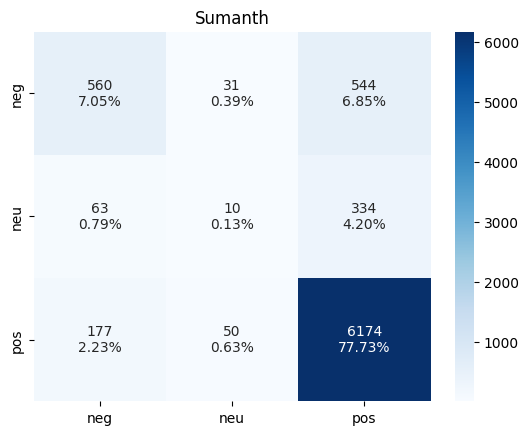

In [14]:
group_counts = ["{0:0.0f}".format(value) for value in conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf1.flatten()/np.sum(conf1)]
labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
x_axis_labels = ['neg','neu','pos'] 
y_axis_labels = ['neg','neu','pos'] 
sns.heatmap(conf1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=labels, fmt='', cmap="Blues").set_title("Sumanth")

# Overview of predicted sentiments by Vader

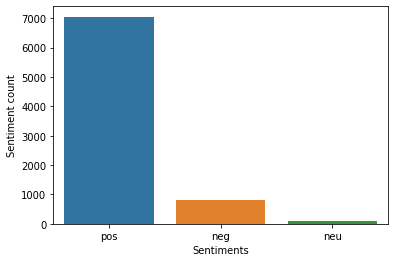

In [11]:
ax = sns.countplot(x ='com_score', data = icreviews)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

# Sentiment distribution pie plot

Text(0.5, 1.0, 'Sentiment distribution pie chart')

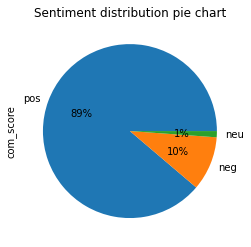

In [12]:
icreviews['com_score'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution pie chart")

# Top 10 ice cream brand sort by number of reviews

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

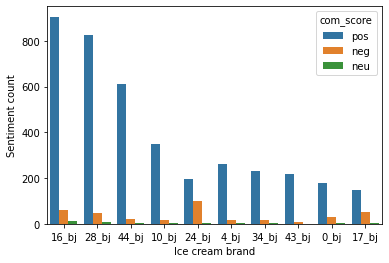

In [13]:
df_prod_reviewcount = icreviews['key'].value_counts().head(10).reset_index()
df_prod_isin = icreviews.loc[icreviews['key'].isin(df_prod_reviewcount['index'])]
ax1 = sns.countplot(x ='key', hue='com_score', data = df_prod_isin, order = df_prod_isin['key'].value_counts().index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

# Top 10 ice cream brand sort by positive review

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

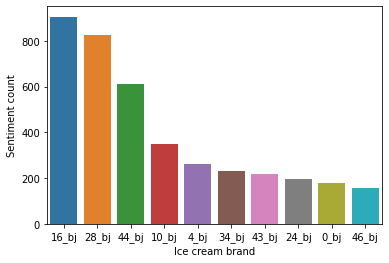

In [14]:
df_posreview = icreviews.loc[icreviews['com_score'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_positivecount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

# Top 10 ice cream brand sort by negative review

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

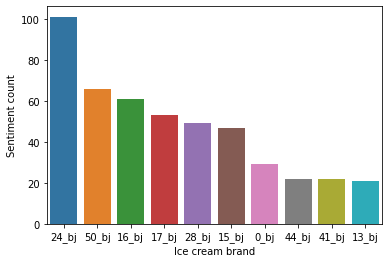

In [15]:
dfnegreview = icreviews.loc[icreviews['com_score'] == 'neg']
df_prod_negcount = dfnegreview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_negcount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

# Top 10 ice cream brand sort by neutral review

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

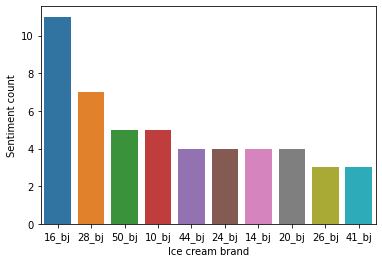

In [16]:
dfneureview = icreviews.loc[icreviews['com_score'] == 'neu']
df_prod_neucount = dfneureview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_neucount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

# Top 10 ice cream brand sort by 3 stars rating

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

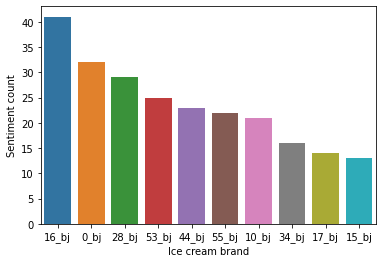

In [19]:
dfneureview = icreviews.loc[icreviews['b_star'] == 'neu']
df_prod_neucount = dfneureview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_neucount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')